# 2) Salary_hike -> Build a prediction model for Salary_hike


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Data Visualization

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

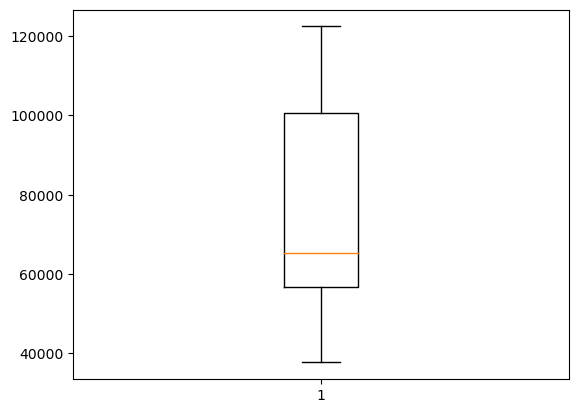

In [6]:
plt.boxplot(data["Salary"]) 
plt.show() 

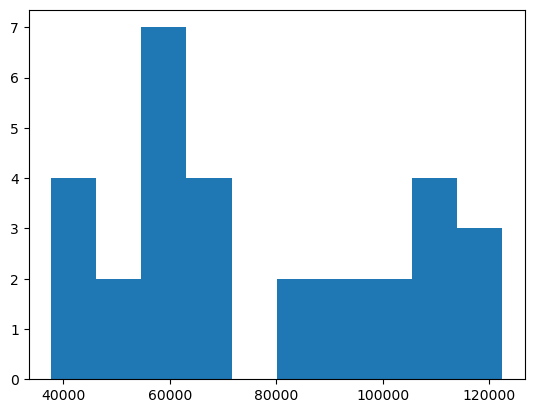

In [7]:
plt.hist(data["Salary"]) 
plt.show() 

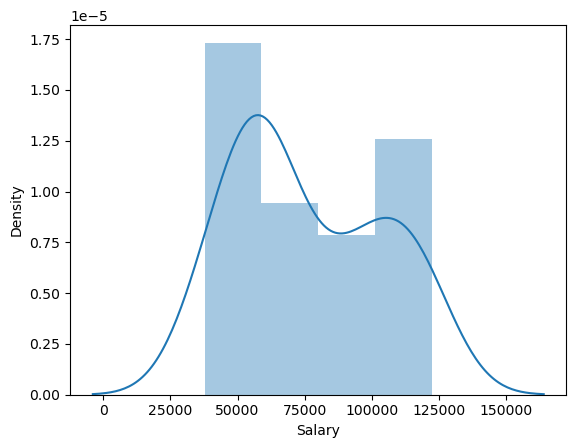

In [8]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(data['Salary']) 
plt.show() 

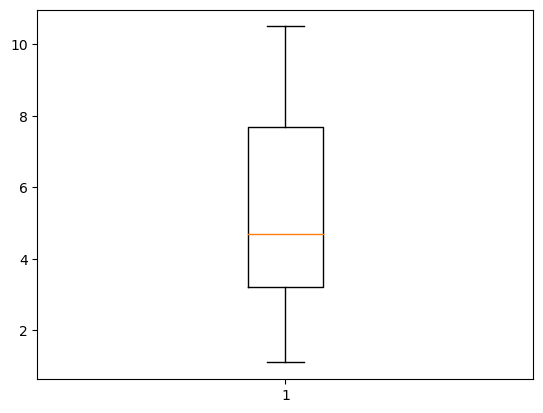

In [9]:
plt.boxplot(data["YearsExperience"]) 
plt.show()

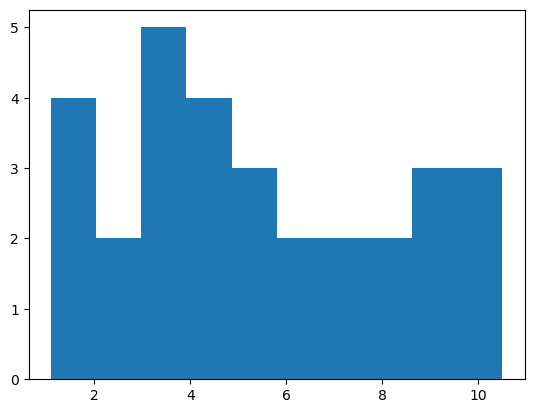

In [10]:
plt.hist(data["YearsExperience"]) 
plt.show()

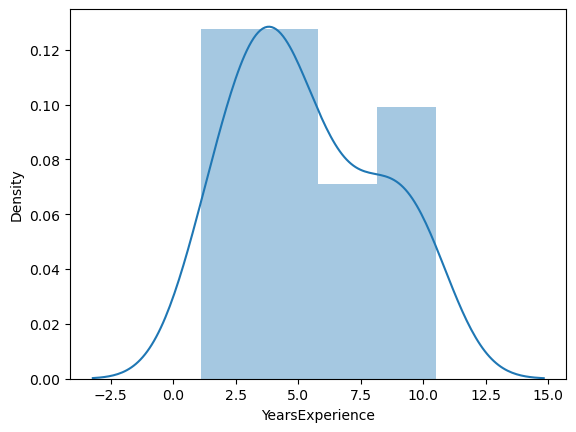

In [11]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(data['YearsExperience']) 
plt.show() 

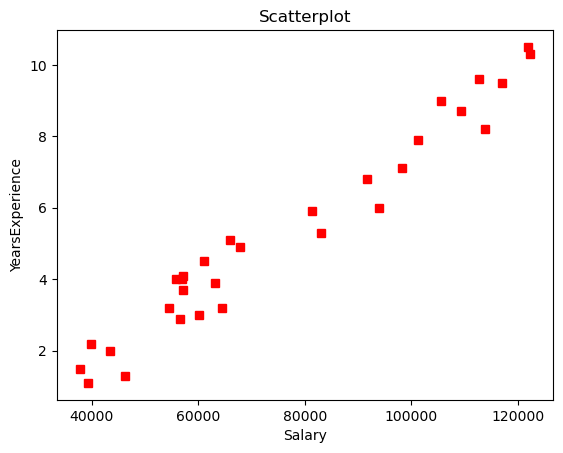

In [12]:
plt.plot(data["Salary"],data["YearsExperience"],"rs")
plt.xlabel("Salary")
plt.ylabel("YearsExperience")
plt.title("Scatterplot")
plt.show()

# Correlation Analysis

In [13]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [14]:
#model
model = smf.ols("Salary~YearsExperience",data=data).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        19:49:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
pred = model.predict(data.YearsExperience)

In [17]:
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [18]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [19]:
rmse_lin = np.sqrt(np.mean((np.array(data['Salary'])-np.array(pred))**2))
rmse_lin

5592.043608760662

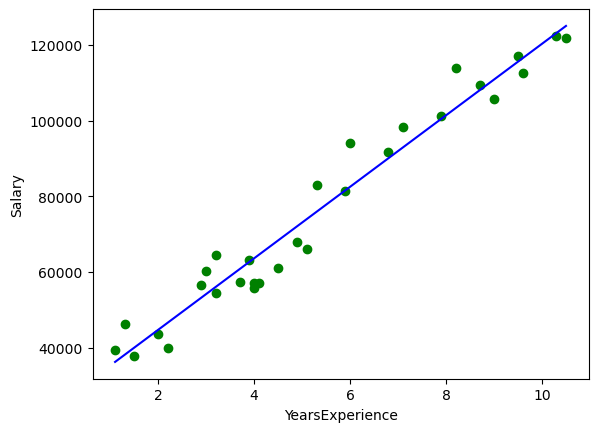

In [20]:
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='green')
plt.plot(data['YearsExperience'],pred,color='blue')
plt.xlabel('YearsExperience')
plt.ylabel('Salary') 
plt.show()

In [21]:
#model2
model2 = smf.ols('Salary~np.log(YearsExperience)',data=data).fit()
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [22]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                        19:49:42   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
pred2 = model2.predict(pd.DataFrame(data['YearsExperience'])) 
pred2  

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [24]:
model2.resid

0     20547.151661
1     20629.764808
2      6348.448095
3       467.737694
4     -7034.138875
5     -1494.050079
6       638.157559
7     -7685.943929
8      2314.056071
9    -10833.718504
10    -6941.105863
11   -15392.552842
12   -14229.552842
13   -15107.628149
14   -14855.422577
15   -11484.295729
16   -15016.791737
17      481.170118
18    -5596.066704
19     6298.867023
20     -982.502137
21     3800.485304
22     2496.628610
23    13494.081316
24     6711.079249
25     1486.286888
26    10679.131565
27     5920.185400
28    12819.992753
29    11520.545855
dtype: float64

In [25]:
rmse_lin = np.sqrt(np.mean((np.array(data['Salary'])-np.array(pred2))**2))
rmse_lin   

10302.893706228308

Text(0, 0.5, 'Salary')

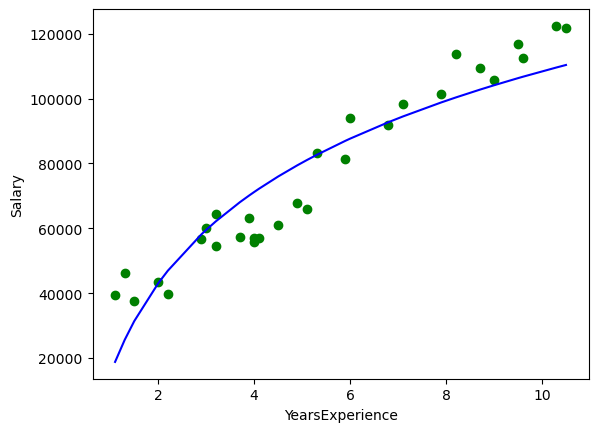

In [26]:
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='green')
plt.plot(data['YearsExperience'],pred2,color='blue')
plt.xlabel('YearsExperience')
plt.ylabel('Salary') 

In [27]:
pred2.corr(data.Salary)

0.9240610817882637

In [28]:
student_resid = model2.resid_pearson 
student_resid

array([ 1.92668535,  1.9344319 ,  0.59528747,  0.04385928, -0.65958399,
       -0.14009554,  0.05983938, -0.72070308,  0.21698667, -1.01586668,
       -0.65086038, -1.4433439 , -1.33429059, -1.41662681, -1.39297775,
       -1.07687064, -1.40810917,  0.04511883, -0.52473744,  0.5906383 ,
       -0.09212822,  0.35636761,  0.23410631,  1.26532617,  0.62929102,
        0.1393676 ,  1.00137122,  0.55512972,  1.20211758,  1.08026978])

In [29]:
#model3(exponential model)
model3 = smf.ols('np.log(Salary)~YearsExperience',data=data).fit()
model3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [30]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           7.03e-18
Time:                        19:49:43   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
pred_log = model3.predict(pd.DataFrame(data['YearsExperience']))
pred_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [32]:
#exponential
pred3=np.exp(pred_log)
pred3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [33]:
model3.resid

0    -0.065327
1     0.070353
2    -0.157344
3    -0.077217
4    -0.189492
5     0.073291
6     0.120836
7    -0.003905
8     0.164716
9    -0.017461
10    0.057676
11   -0.079792
12   -0.059162
13   -0.069532
14   -0.051493
15    0.004230
16   -0.049362
17    0.155353
18    0.059102
19    0.190292
20    0.066210
21    0.097387
22    0.027382
23    0.106188
24    0.004207
25   -0.069235
26   -0.029540
27   -0.079842
28   -0.084591
29   -0.113931
dtype: float64

In [34]:
rmse_lin = np.sqrt(np.mean((np.array(data['Salary'])-np.array(pred3))**2))
rmse_lin   

7213.235076620129

# In above the three model--model1 (Rsquared value) is greater than to model2 and model3 
# so we can choose model1